In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import clear_output
import threading

import time
from datetime import datetime



In [ ]:
issData = []

now = datetime.now()
startTimestamp = datetime.timestamp(now)

def pullData(): 
    df = pd.read_json('http://api.open-notify.org/iss-now.json')
    issData.append([df.loc['latitude','iss_position'], df.loc['longitude','iss_position']])
    # print(issData)
  
    now = datetime.now()
    currentTimestamp = datetime.timestamp(now)

    if int(startTimestamp + 60*18) > int(currentTimestamp):
        time.sleep(10)
        pullData()
    else: 
      print('Timeout reached')
      

pullData()

Timeout reached


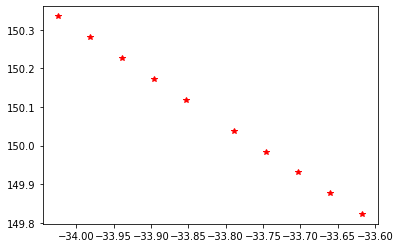

In [ ]:
data = np.array(issData)

fig, ax = plt.subplots()

x = data[:, 0]
y = data[:, 1]

plt.plot(data[:, 0], data[:, 1], 'r*')

plt.show()